In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
print(f"Eğitim verisi boyutu: {x_train.shape}, Eğitim etiketleri boyutu: {y_train.shape}")
print(f"Test verisi boyutu: {x_test.shape}, Test etiketleri boyutu: {y_test.shape}")

Eğitim verisi boyutu: (50000, 32, 32, 3), Eğitim etiketleri boyutu: (50000, 1)
Test verisi boyutu: (10000, 32, 32, 3), Test etiketleri boyutu: (10000, 1)


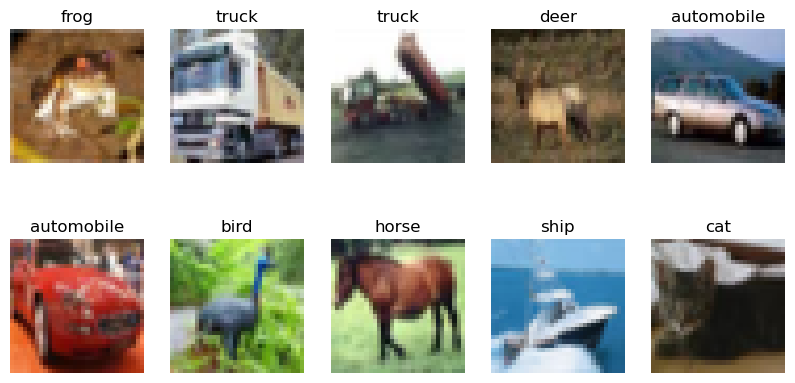

In [4]:
# Etiketleri sınıf isimleriyle eşleştirelim
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# İlk birkaç resmi görselleştirelim
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.show()

In [5]:
pandas = pd.DataFrame(y_train)
pandas.value_counts()

0
0    5000
1    5000
2    5000
3    5000
4    5000
5    5000
6    5000
7    5000
8    5000
9    5000
Name: count, dtype: int64

In [6]:
x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = to_categorical(y_train , num_classes=10)
y_test = to_categorical(y_test , num_classes=10)

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
datagen.fit(x_train)

In [8]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# CIFAR-10 için uyarlanmış AlexNet
model = Sequential([
    # 1. Evrişim Katmanı
    Conv2D(96, (3, 3), strides=(1, 1), activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),  # Boyut: (32x32) -> (16x16)

    # 2. Evrişim Katmanı
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),  # Boyut: (16x16) -> (8x8)

    # 3. Evrişim Katmanı
    Conv2D(384, (3, 3), padding='same', activation='relu'),

    # 4. Evrişim Katmanı
    Conv2D(384, (3, 3), padding='same', activation='relu'),

    # 5. Evrişim Katmanı
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),  # Boyut: (8x8) -> (4x4)

    # Tam Bağlantılı Katmanlar
    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # CIFAR-10 için 10 sınıf
])

# Modeli derleyelim
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Modelin özetini inceleyelim
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 96)        2688      
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 15, 15, 256)       221440    
                                                                 
 batch_normalization_1 (Batc  (None, 15, 15, 256)      1024      
 hNormalization)                                                 
                                                        

In [9]:
# Modeli eğitelim
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(x_test, y_test)
)

Epoch 1/10


2024-11-20 19:24:56.802834: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


782/782 [==============================] - 203s 259ms/step - loss: 1.8013 - accuracy: 0.3317 - val_loss: 1.7541 - val_accuracy: 0.3758
Epoch 2/10
782/782 [==============================] - 206s 263ms/step - loss: 1.2681 - accuracy: 0.5490 - val_loss: 1.3412 - val_accuracy: 0.5390
Epoch 3/10
782/782 [==============================] - 202s 259ms/step - loss: 1.0854 - accuracy: 0.6219 - val_loss: 1.3763 - val_accuracy: 0.5218
Epoch 4/10
782/782 [==============================] - 205s 262ms/step - loss: 0.9635 - accuracy: 0.6657 - val_loss: 1.1061 - val_accuracy: 0.6213
Epoch 5/10
782/782 [==============================] - 206s 264ms/step - loss: 0.8786 - accuracy: 0.6990 - val_loss: 1.0616 - val_accuracy: 0.6437
Epoch 6/10
782/782 [==============================] - 205s 262ms/step - loss: 0.8211 - accuracy: 0.7170 - val_loss: 1.1037 - val_accuracy: 0.6255
Epoch 7/10
782/782 [==============================] - 204s 261ms/step - loss: 0.7797 - accuracy: 0.7332 - val_loss: 1.0448 - val_accura

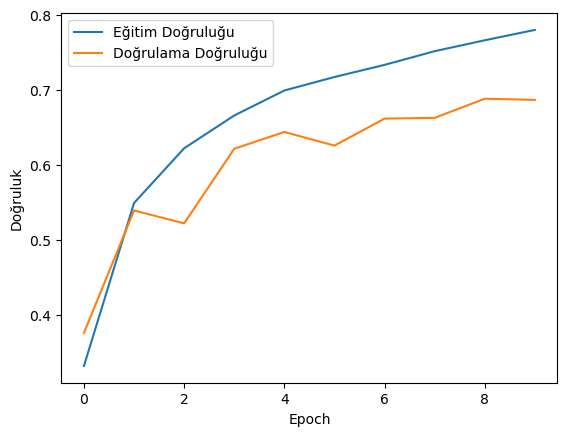

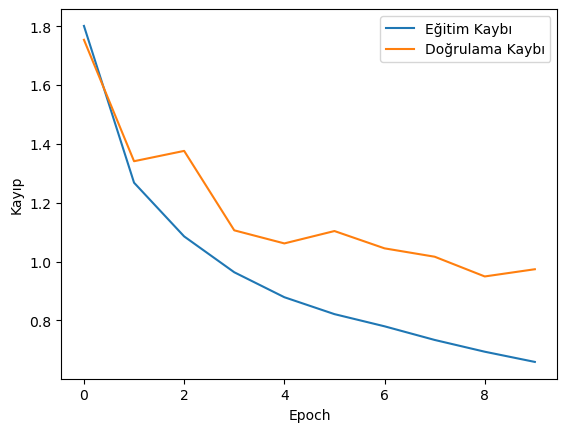

In [10]:
# Eğitim ve doğrulama doğruluğunu görselleştirelim
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.show()

# Eğitim ve doğrulama kaybını görselleştirelim
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()
plt.show()


In [11]:
# Test veri setindeki doğruluk oranını hesaplayalım
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Doğruluğu: {test_accuracy * 100:.2f}%")


Test Doğruluğu: 68.65%


1/1 [==============================] - 0s 57ms/step


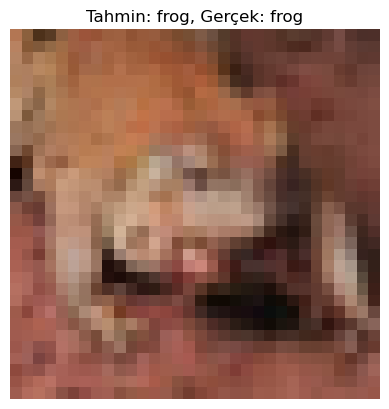

In [12]:
# Test veri setinden bir örnek seçip tahmin yapalım
import numpy as np

sample_index = 5
sample_image = x_test[sample_index]
sample_label = y_test[sample_index]

# Tahmin
prediction = model.predict(np.expand_dims(sample_image, axis=0))
predicted_class = np.argmax(prediction)

# Görüntüyü ve tahmini gösterelim
plt.imshow(sample_image)
plt.title(f"Tahmin: {class_names[predicted_class]}, Gerçek: {class_names[np.argmax(sample_label)]}")
plt.axis('off')
plt.show()


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Veri setini yükleyelim
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Veriyi normalize edelim ve etiketleri one-hot encode yapalım
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Modeli tanımlayalım
model = Sequential([
    Conv2D(96, (3, 3), strides=(1, 1), activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

    Conv2D(256, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

    Conv2D(384, (3, 3), padding='same', activation='relu'),
    Conv2D(384, (3, 3), padding='same', activation='relu'),
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Modeli derleyelim
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping callback'i tanımlayalım
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Modeli eğitelim
history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping]  # Early stopping callback'i burada ekleniyor
)

# Model performansını değerlendirelim
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Kayıp: {test_loss:.4f}, Test Doğruluk: {test_accuracy:.4f}")


Epoch 1/50
 23/782 [..............................] - ETA: 3:07 - loss: 3.2870 - accuracy: 0.1067

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

# GPU kullanılabilir mi kontrol edelim
if tf.config.list_physical_devices('GPU'):
    print("GPU başarıyla algılandı ve kullanılacak.")
else:
    print("GPU algılanamadı, CPU kullanılacak.")

# CIFAR-10 veri setini yükle ve hazırla
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Resim boyutunu büyütmek için yeniden boyutlandırma ve normalize etme
x_train = tf.image.resize(x_train, (64, 64)) / 255.0
x_test = tf.image.resize(x_test, (64, 64)) / 255.0

# Etiketleri one-hot encoding formatına dönüştür
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Model: AlexNet benzeri yapı
model = Sequential([
    # 1. Evrişim Katmanı
    Conv2D(96, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    # 2. Evrişim Katmanı
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    # 3. Evrişim Katmanı
    Conv2D(384, (3, 3), activation='relu', padding='same'),

    # 4. Evrişim Katmanı
    Conv2D(384, (3, 3), activation='relu', padding='same'),

    # 5. Evrişim Katmanı
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    # Tam Bağlantılı Katmanlar
    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # CIFAR-10 için 10 sınıf
])

# Modeli derle
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Modeli eğit
history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping]
)

# Model performansını test et
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Kayıp: {test_loss:.4f}, Test Doğruluk: {test_accuracy:.4f}")

# Eğitim ve doğrulama grafikleri
import matplotlib.pyplot as plt

# Doğruluk grafiği
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.show()

# Kayıp grafiği
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()
plt.show()


GPU başarıyla algılandı ve kullanılacak.
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 83s 0us/step


/opt/anaconda3/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
436/782 ━━━━━━━━━━━━━━━━━━━━ 1:16 222ms/step - accuracy: 0.1037 - loss: 3.0656